# Ladder of powers

Transformations using a **ladder of powers** are used when performing empirical modeling. The idea is to find a transformation that successfully linearizes data. If the data are linear under a certain transformation, then the model will be a good empirical description of the behavior of the data set on that domain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Some examples

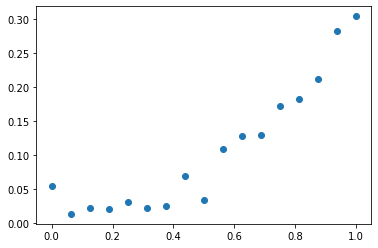

In [13]:
# quadratic model y = 0.3 x^2
np.random.seed(101)
n1 = 17
x1 = np.linspace(0,1, num=n1)
y1 = [0.3 * x**2.0 + 0.02 * np.random.normal() for x in x1]
plt.plot(x1,y1,'o');

In [14]:
outstr = '['
for i in range(0,n1):
    outstr += '{:.3f}'.format(y1[i]) + ', '
print(outstr)

[0.054, 0.014, 0.023, 0.021, 0.032, 0.023, 0.025, 0.070, 0.035, 0.110, 0.128, 0.130, 0.173, 0.183, 0.211, 0.283, 0.304, 


## Example 1

A data set that grows faster than linearly.

In [16]:
x1 = [0.0, 0.0625, 0.125, 
      0.1875, 0.25, 0.3125, 
      0.375, 0.4375, 0.5, 
      0.5625, 0.625, 0.6875, 
      0.75, 0.8125, 0.875, 
      0.9375, 1.0]
y1 = [0.054, 0.014, 0.023, 
      0.021, 0.032, 0.023, 
      0.025, 0.070, 0.035, 
      0.110, 0.128, 0.130, 
      0.173, 0.183, 0.211, 
      0.283, 0.304]
n1 = len(x1)

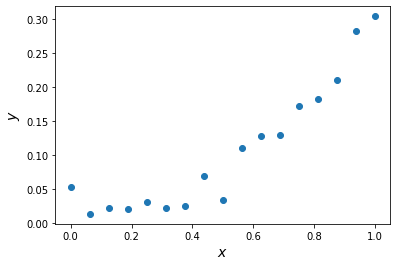

In [19]:
plt.plot(x1,y1,'o');
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$y$', fontsize=14);

A linear model is not going to describe this data set very well. Let's see what happens if we do try to do that.

In [25]:
# import the least-squares optimizer to attempt to fit this data to a line using least-squares
from linear_fitting_functions import least_squares_optimizer_fit_linear

After 2 iterations...
The optimization was successful! Here are the values it found:
       m =     0.2726
       b =    -0.0293
The sum of squared deviations is 0.0251
And in case you need to know...
The largest absolute error is r = 0.0833 
 It occurs when x =  0.0000


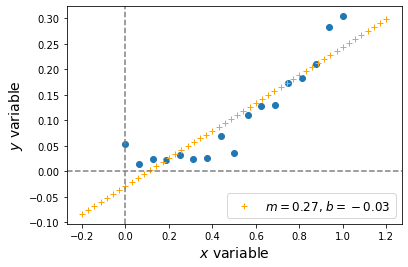

In [42]:
n1pred = 50
x1pred = np.linspace(-0.2, 1.2,num=n1pred)
least_squares_optimizer_fit_linear(x1, y1, 0.3, 0, x1pred, display_table=False)

This could be ok if we had a good reason to propose a linear model for this data set. But in empirical modeling, we will demand a more close fit to data. So let's experiment with a ladder of powers.

Want something that "squeezes" the tail of the dataset downward. Take a ladder of powers transformation on $y$ below $z^1$. So use something like the square root, or natural log.

Let's look at what happens when we use both the square root and the natural log in turn.

### Transformation (a): $\sqrt{y}$

The proposal with this transformation is that 

$$ \sqrt{y} = ax + b $$

So we'll need to build an array that holds the square root of $y$ and graph the transformed variables.

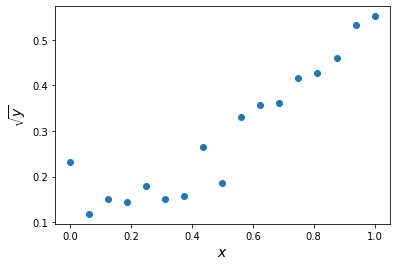

In [43]:
sqrt_y1 = np.sqrt(y1)
plt.plot(x1,sqrt_y1,'o');
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$\sqrt{y}$', fontsize=14);

That does look more linear than the raw data in the original variables. Let's fit a straight line to it using least-squares and then transform back.

After 2 iterations...
The optimization was successful! Here are the values it found:
       m =     0.4215
       b =     0.0848
The sum of squared deviations is 0.0511
And in case you need to know...
The largest absolute error is r = 0.1476 
 It occurs when x =  0.0000


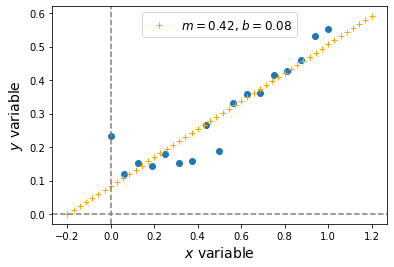

In [44]:
least_squares_optimizer_fit_linear(x1, sqrt_y1, 0.5, 0.1, x1pred, display_table=False)

That does look better than before. We obtain a slope $a=0.4215$ and an intercept $b=0.0848$. That means the empirical model is

$$ \sqrt{y} = 0.4215 x + 0.0848 $$

In the original variables, solving for $y$, we have

$$ y = (0.4215 x + 0.0848)^2 = 0.4215^2 x^2 + 2(0.4215)(0.0848) x + 0.0848^2 $$

$$ y = 0.1777 x^2 + 0.0715 x + 0.0072 $$

Let's make predictions in the original variables now.

In [45]:
y1pred_a = np.empty(n1pred)
a_result_a = 0.4215
b_result_a = 0.0848
for i in range(0, n1pred):
    y1pred_a[i] = (a_result_a * x1pred[i] + b_result_a)**2.0

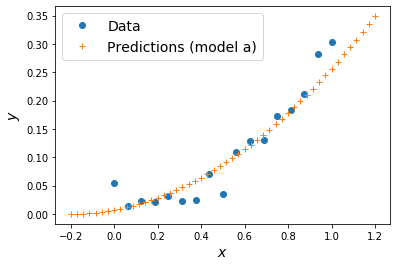

In [46]:
plt.plot(x1,y1,'o', label='Data');
plt.plot(x1pred, y1pred_a, '+', label='Predictions (model a)');
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$y$', fontsize=14);
plt.legend(fontsize=14);

### Transformation (b): $\ln{y}$

The proposal with this transformation is similar to the exponential model transformations (semi-log) that we used before. It means that we are proposing 

$$ \ln{y} = ax + b $$

So we'll need to build an array that holds $\ln y$ and graph the transformed variables.

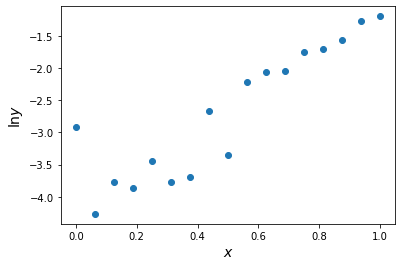

In [47]:
ln_y1 = np.log(y1)
plt.plot(x1,ln_y1,'o');
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$\ln{y}$', fontsize=14);

This also looks fairly linear even compared to the square root model from before. Let's fit a straight line to it using least-squares and then transform back.

After 2 iterations...
The optimization was successful! Here are the values it found:
       m =     2.9277
       b =    -4.1405
The sum of squared deviations is 3.0914
And in case you need to know...
The largest absolute error is r = 1.2217 
 It occurs when x =  0.0000


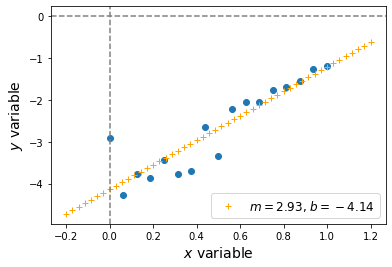

In [48]:
least_squares_optimizer_fit_linear(x1, ln_y1, 3, -4, x1pred, display_table=False)

So the results are that $a = 2.9277$ and $b=-4.1405$ from least-squares. That means the empirical model is

$$ \ln{y} = 2.9277 x -4.1405 $$

In the original variables, solving for $y$, we have

$$ y = \exp\left(2.9277 x -4.1405\right) = e^{-4.1405}e^{2.9277 x} $$

$$ y = 0.0159 e^{2.9277 x} $$

Let's make predictions in the original variables now.

In [49]:
y1pred_b = np.empty(n1pred)
a_result_b = 2.9277
b_result_b = -4.1405
for i in range(0, n1pred):
    y1pred_b[i] = np.exp(a_result_b * x1pred[i] + b_result_b)

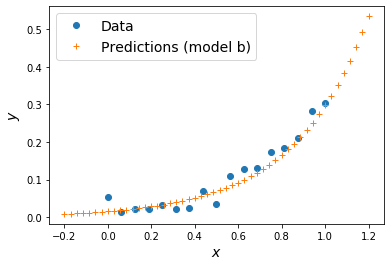

In [50]:
plt.plot(x1,y1,'o', label='Data');
plt.plot(x1pred, y1pred_b, '+', label='Predictions (model b)');
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$y$', fontsize=14);
plt.legend(fontsize=14);

That also really looks fine. Both of these models are fairly good fits to the data! Let's plot them both together against the provided data.

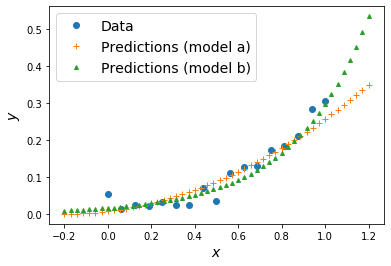

In [54]:
plt.plot(x1,y1,'o', label='Data');
plt.plot(x1pred, y1pred_a, '+', label='Predictions (model a)');
plt.plot(x1pred, y1pred_b, '^', label='Predictions (model b)', markersize=4);
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$y$', fontsize=14);
plt.legend(fontsize=14);

Finally, let's plot the absolute errors for both models for another way of seeing if one model has an advantage over the other. I find it doubtful that they will.

In [55]:
abs_err_model_a = np.empty(n1)
abs_err_model_b = np.empty(n1)
for i in range(0, n1):
    abs_err_model_a[i] = abs( y1[i] - (a_result_a * x1[i] + b_result_a)**2.0 )
    abs_err_model_b[i] = abs( y1[i] - np.exp(a_result_b * x1[i] + b_result_b) )

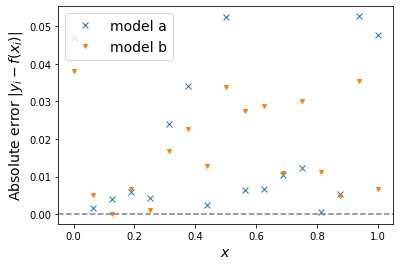

In [59]:
plt.plot(x1, abs_err_model_a, 'x', label='model a');
plt.plot(x1, abs_err_model_b, 'v', label='model b', markersize=4);
plt.xlabel('$x$', fontsize=14);
plt.ylabel('Absolute error $|y_i - f(x_i)|$', fontsize=14);
plt.legend(fontsize=14);
plt.axhline(0, linestyle='--', color='gray');

The errors for model b do seem systematically smaller than those for model a. So this could be a good indicator to choose the logarithmic transformation for this data set.

## Example 2

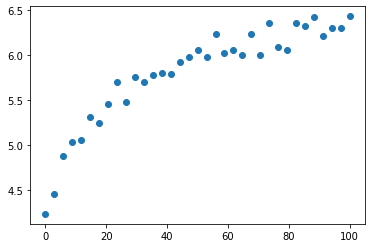

In [70]:
# model y = 4 (x+2)^{1/3}
np.random.seed(1434)
n2 = 35
x2 = np.linspace(0,100, num=n2)
y2 = [4 * (x + 2)**(0.1) + 0.1 * np.random.normal() for x in x2]
plt.plot(x2,y2,'o');

In [77]:
outstr = '['
for i in range(0,n2):
    outstr += '{:.1f}'.format(x2[i]) + ', '
print(outstr)

[0.0, 2.9, 5.9, 8.8, 11.8, 14.7, 17.6, 20.6, 23.5, 26.5, 29.4, 32.4, 35.3, 38.2, 41.2, 44.1, 47.1, 50.0, 52.9, 55.9, 58.8, 61.8, 64.7, 67.6, 70.6, 73.5, 76.5, 79.4, 82.4, 85.3, 88.2, 91.2, 94.1, 97.1, 100.0, 


In [93]:
x2 = [0.0, 2.9, 5.9, 8.8, 11.8, 14.7, 
      17.6, 20.6, 23.5, 26.5, 29.4, 32.4, 
      35.3, 38.2, 41.2, 44.1, 47.1, 50.0, 
      52.9, 55.9, 58.8, 61.8, 64.7, 67.6, 
      70.6, 73.5, 76.5, 79.4, 82.4, 85.3, 
      88.2, 91.2, 94.1, 97.1, 100.0, ]
y2 = [4.233, 4.454, 4.880, 5.030, 5.057, 5.312, 
      5.242, 5.460, 5.706, 5.482, 5.753, 5.700, 
      5.777, 5.807, 5.787, 5.929, 5.982, 6.060, 
      5.976, 6.242, 6.029, 6.060, 6.006, 6.235, 
      6.008, 6.357, 6.090, 6.061, 6.359, 6.330, 
      6.431, 6.213, 6.304, 6.308, 6.434]
n2 = len(y2)

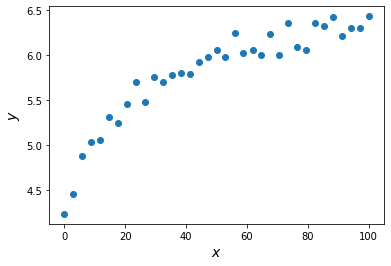

In [79]:
plt.plot(x2,y2,'o');
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$y$', fontsize=14);

This is another case where a raw straight line model won't be a good empirical description of the data. Let's try a ladder of powers transformation. This time, we want to enhance the decaying tail of $y$ values. Let's try to square the values and see what happens. This means that

$$ y^2 = ax + b$$

is the proposed empirical model.

In [82]:
sqr_y2 = np.power(y2, 2.0)

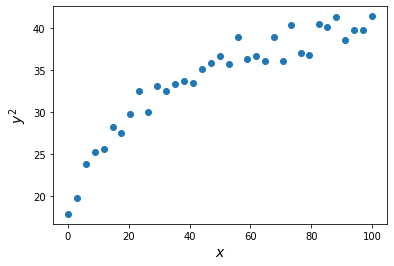

In [83]:
plt.plot(x2,sqr_y2,'o');
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$y^2$', fontsize=14);

This doesn't really look all that much linear, honestly... Let's try a greater power like $y^4$

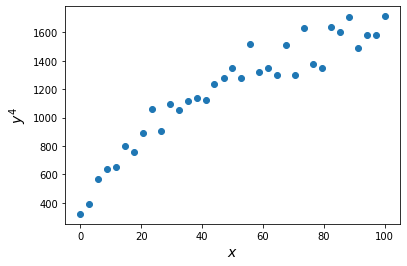

In [84]:
four_y2 = np.power(y2, 4.0)
plt.plot(x2,four_y2,'o');
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$y^4$', fontsize=14);

A little better. Let's keep that one for now. We can try a higher power later and see if it does any better. Let's call this model (a) for this example.

After 6 iterations...
The optimization was successful! Here are the values it found:
       m =    11.7443
       b =   601.9772
The sum of squared deviations is 570380.9464
And in case you need to know...
The largest absolute error is r = 280.9121 
 It occurs when x =  0.0000


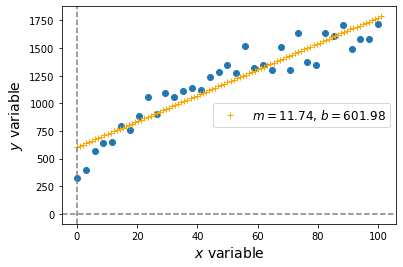

In [85]:
n2pred = 100
x2pred = np.linspace(0,101,num=n2pred)
least_squares_optimizer_fit_linear(x2, four_y2, 1000, 0, x2pred, display_table=False)

Well, it's not fantastic, but let's use these values for now. This means that our model is

$$ y^4 = 11.74 x + 602.0 $$

so that 

$$ y = (11.74 x + 602.0)^{1/4}$$

in terms of the original variables.

In [86]:
a2_result_a = 11.74
b2_result_a = 602
y2pred_a = np.empty(n2pred)
for i in range(0, n2pred):
    y2pred_a[i] = (a2_result_a * x2pred[i] + b2_result_a)**(0.25)

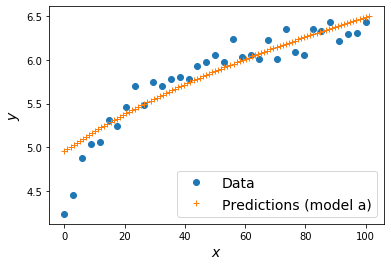

In [87]:
plt.plot(x2,y2,'o', label='Data');
plt.plot(x2pred, y2pred_a, '+', label='Predictions (model a)');
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$y$', fontsize=14);
plt.legend(fontsize=14);

This model does poorly at low values of $x$

## Transformation (b) $y^8$

Let's see what happens if we use an even higher power of $y^8$. Does that make things any better at low $x$?

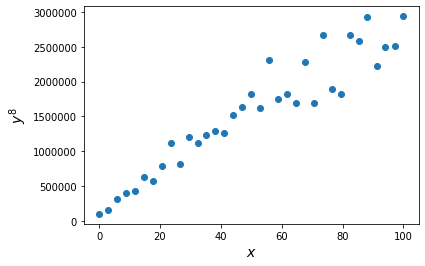

In [88]:
eight_y2 = np.power(y2, 8.0)
plt.plot(x2,eight_y2,'o');
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$y^8$', fontsize=14);

The $y$ range is very big, but this does look more linear than the last transformation. Let's use it as our model (b)

After 8 iterations...
The optimization was successful! Here are the values it found:
       m = 25956.7295
       b = 254352.3927
The sum of squared deviations is 2130935498174.1106
And in case you need to know...
The largest absolute error is r = 599237.5454 
 It occurs when x =  55.9000


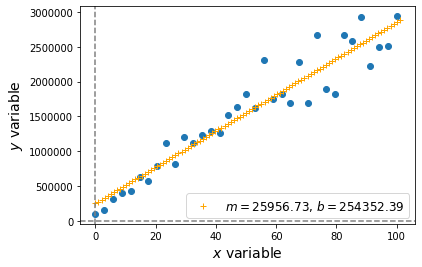

In [89]:
least_squares_optimizer_fit_linear(x2, eight_y2, 30000, 0, x2pred, display_table=False)

The sum of squared deviations is going a little crazy because we are working with really big numbers now, but the fit looks decent. Let's use these values of $a = 25956.7$ and $b=254352$ in our eighth power model

$$ y^8 = 25956.7 x + 254352$$

which means that

$$ y = (25956.7 x + 254352)^{\frac18} $$

In [90]:
a2_result_b = 25956.7
b2_result_b = 254352
y2pred_b = np.empty(n2pred)
for i in range(0, n2pred):
    y2pred_b[i] = (a2_result_b * x2pred[i] + b2_result_b)**(1./8.)

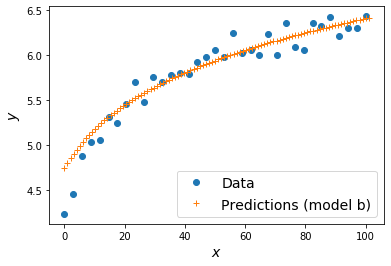

In [91]:
plt.plot(x2,y2,'o', label='Data');
plt.plot(x2pred, y2pred_b, '+', label='Predictions (model b)');
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$y$', fontsize=14);
plt.legend(fontsize=14);

It still doesn't quite get the trend at low $x$, but at least it does a better job than the last one. Let's plot them together like we did in example 2.

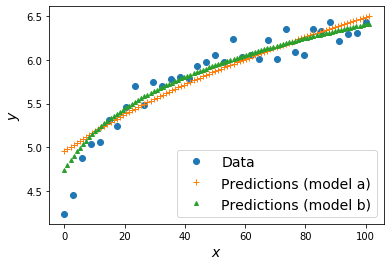

In [92]:
plt.plot(x2,y2,'o', label='Data');
plt.plot(x2pred, y2pred_a, '+', label='Predictions (model a)');
plt.plot(x2pred, y2pred_b, '^', label='Predictions (model b)', markersize=4);
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$y$', fontsize=14);
plt.legend(fontsize=14);

To make the differences clearer, let's look at a graph of absolute errors.

In [94]:
abs_err2_model_a = np.empty(n2)
abs_err2_model_b = np.empty(n2)
for i in range(0, n2):
    abs_err2_model_a[i] = abs( y2[i] - (a2_result_a * x2[i] + b2_result_a)**(0.25) )
    abs_err2_model_b[i] = abs( y2[i] - (a2_result_b * x2[i] + b2_result_b)**(1./8.) )

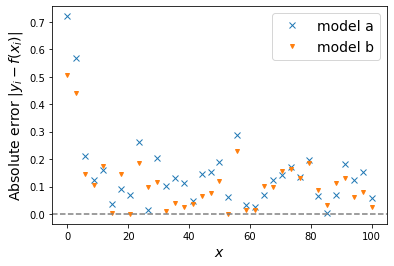

In [96]:
plt.plot(x2, abs_err2_model_a, 'x', label='model a');
plt.plot(x2, abs_err2_model_b, 'v', label='model b', markersize=4);
plt.xlabel('$x$', fontsize=14);
plt.ylabel('Absolute error $|y_i - f(x_i)|$', fontsize=14);
plt.legend(fontsize=14);
plt.axhline(0, linestyle='--', color='gray');

On this graph, we see that altought both models have a hard time with low $x$, they are roughly comparable at higher $x$ values. We can also say that on average, model (b) does generally have smaller absolute errors. So we could select that one.